In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df = pd.read_csv('DataAnalyst.csv')


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


<h3> The data at a glance </h3>

In [ ]:
df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
Unnamed: 0           2253 non-null int64
Job Title            2253 non-null object
Salary Estimate      2253 non-null object
Job Description      2253 non-null object
Rating               2253 non-null float64
Company Name         2252 non-null object
Location             2253 non-null object
Headquarters         2253 non-null object
Size                 2253 non-null object
Founded              2253 non-null int64
Type of ownership    2253 non-null object
Industry             2253 non-null object
Sector               2253 non-null object
Revenue              2253 non-null object
Competitors          2253 non-null object
Easy Apply           2253 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 281.8+ KB


In [4]:
df.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


After a introductory glance at the data. Some questions I would like to answer are:  
<ol> 
<li>Which companies post the most often looking for Data Analysts?</li>
<li>What are the most popular cities for Data Analsts?</li>  
<li>Whats are the most common things sought after in the job descriptions?</li>  
<li>Whats the breakdown of the Data Analyst sector look like?</li>  
<li>What does the annual salary look like?</li>  
    <ol>
    <li>How does the salary range between the cities?</li>
    <li>Does the ratings have an affect on the salary?</li>
    </ol>
</ol>

<h3> Data Cleaning </h3>

In [5]:
#Trimming the data
drop_col = ['Unnamed: 0', 'Headquarters', 'Size', 'Founded', 'Revenue', 'Competitors', 'Easy Apply']
df.dropna()
df.drop(drop_col, axis = 1, inplace = True)


In [6]:
#Some columns contain -1 as a int and as a string so we will replace that with a nan
df = df.replace(-1, np.nan)
df = df.replace('-1', np.nan)
df.isnull().sum()


Job Title              0
Salary Estimate        1
Job Description        0
Rating               272
Company Name           1
Location               0
Type of ownership    163
Industry             353
Sector               353
dtype: int64

In [7]:
# #Convert [Salary Estimate] into lower and upper values

df['Salary Estimate'], _ =df['Salary Estimate'].str.split('(', 1).str

df['Lower'], df['Upper'] = df['Salary Estimate'].str.split('-').str
df['Lower'] = df['Lower'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
df['Upper'] = df['Upper'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

In [10]:
df.drop(['Salary Estimate'],axis=1,inplace=True)
df

,Job Title,Job Description,Rating,Company Name,Location,Type of ownership,Industry,Sector,Lower,Upper
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",Nonprofit Organization,Social Assistance,Non-Profit,37,66
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",Nonprofit Organization,Health Care Services & Hospitals,Health Care,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",Company - Private,Internet,Information Technology,37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",Subsidiary or Business Segment,IT Services,Information Technology,37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",37,66
...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO",Company - Private,Staffing & Outsourcing,Business Services,78,104
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO",Company - Public,Wholesale,Business Services,78,104
2250,"Technical Business Analyst (SQL, Data analytic...","Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,78,104
2251,"Data Analyst 3, Customer Experience",Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO",Company - Private,Enterprise Software & Network Solutions,Information Technology,78,104


In [ ]:
#Company names contain newline characters and ratings so lets remove those
df['Company Name'],_=df['Company Name'].str.split('\n', 1).str

<h3> Lets see which companies post the most frequently </h3>

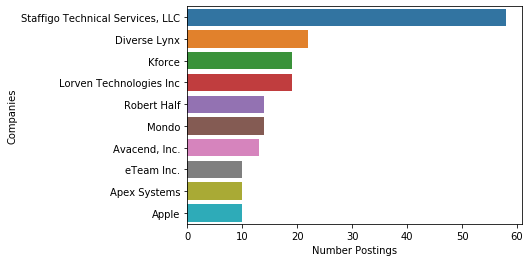

In [38]:
ax = sns.barplot(
        x = df['Company Name'].value_counts().values[:10],
        y = df['Company Name'].value_counts().keys()[:10]
    )
ax.set(xlabel= 'Number Postings', ylabel= 'Companies')
plt.show()

<h3> What are the most popular cities for Data Analysts? </h3>

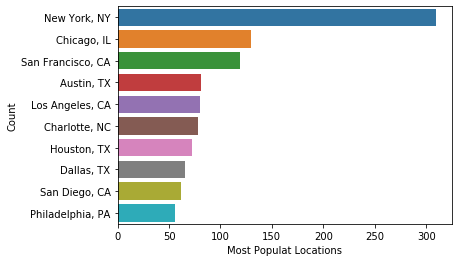

In [39]:
ax = sns.barplot(
        x = df['Location'].value_counts().values[:10],
        y = df['Location'].value_counts().keys()[:10]
    )
ax.set(xlabel='Most Populat Locations', ylabel='Count')
plt.show()

<h3> What are some of the most common things in the job description? </h3>

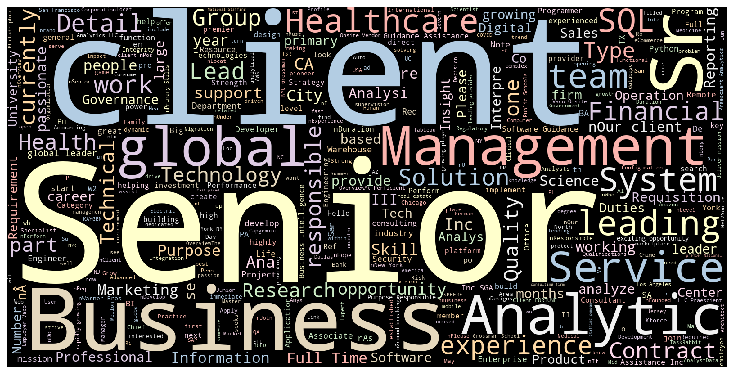

In [134]:
text = df['Job Description'].to_string()
stopwords = set(STOPWORDS)
stopwords.update(['Job', 'Description', ' Title', 'Overview', 'Responsibilities', 'hiring', 'summary',
                 'hire', 'will', 'njob', 'nthe', 'title', 'position', 'seeking', 'nlocation', 'nInterpret',
                 'looking', 'da', 'nData Analyst','Analy', 'nA', 'nWe', 'nPosition', 'dat', 'nTitle', 'nRole',
                 'nAT', 'nKforce', 'Hi', 'Must', 'Us', 'nThis', 'posted', 'nCompany', 'month', 'ID', 'nSummary',
                 'nWeekly hours', 'Name', 'seek', 'Charlotte', 'nWork', 'date', 'current', 'req ID', 'nSkills', 'world',
                 'largest', 'posting', 'fastest growing', 'located', 'Data Anal', 'nWeekly', 'founded', 'nAnalyze',
                 'Hours', 'fastest', 'candidate', 'nAbout', 'nData', 'nGeneral', 'location', 'nCategory', 'Company',
                 'Role', 'New', 'Anal', 'Data', 'Analyst', 'Data Analyst'])

wordcloud = WordCloud(max_words= 400,width=1600, height=800, stopwords = stopwords,  colormap='Pastel1').generate(text)
#1600-800.20-10
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<h3> Whats the breakdown of the Data Analyst sector look like? </h3>

In [121]:
#Create another df that only holds the Sector column of the df
sector_df = pd.DataFrame(df['Sector'].value_counts().head(10)).reset_index()
sector_df

,index,Sector
0,Information Technology,570
1,Business Services,524
2,Finance,169
3,Health Care,151
4,Education,52
5,Insurance,51
6,Accounting & Legal,43
7,Media,42
8,Manufacturing,40
9,Retail,38


In [133]:
by_sector = go.Figure(data=[go.Pie(labels=sector_df['index'],
                             values=sector_df['Sector'],
                             hole=.5,
                             title = 'Count by Sector',
                             marker_colors = px.colors.sequential.Agsunset,
                            )
                     ])

by_sector.update_layout(title = 'Job Count by Sector')
by_sector.show()

<h3> What does the annual salary look like? </h3>

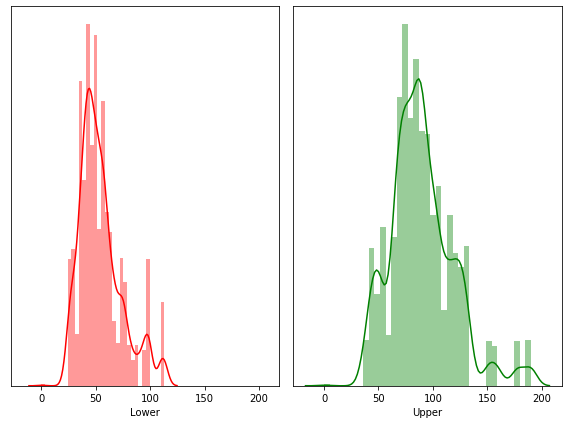

In [142]:
f, axes = plt.subplots(1, 2, figsize=(8, 6), sharex=True)

sns.distplot(df['Lower'], color = 'r', ax = axes[0])
sns.distplot(df['Upper'], color = 'g', ax = axes[1])

#Removes the Y-axis
plt.setp(axes, yticks=[])
plt.tight_layout()

<h3> How does the salary range between the cities? </h3>

In [152]:
#Creates a new column that holds the mean lower and upper salary amounts grouped by location
df['Lower_Average'] = df.groupby('Location')['Lower'].transform('mean')
df['Upper_Average'] = df.groupby('Location')['Upper'].transform('mean')

,Job Title,Job Description,Rating,Company Name,Location,Type of ownership,Industry,Sector,Lower,Upper,Lower_Average,Upper_Average
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",Nonprofit Organization,Social Assistance,Non-Profit,37,66,53.574194,88.896774
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",Nonprofit Organization,Health Care Services & Hospitals,Health Care,37,66,53.574194,88.896774
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",Company - Private,Internet,Information Technology,37,66,53.574194,88.896774
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY",Subsidiary or Business Segment,IT Services,Information Technology,37,66,53.574194,88.896774
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",37,66,53.574194,88.896774
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO",Company - Private,Staffing & Outsourcing,Business Services,78,104,57.468085,86.085106
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO",Company - Public,Wholesale,Business Services,78,104,63.666667,95.111111
2250,"Technical Business Analyst (SQL, Data analytic...","Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,78,104,57.468085,86.085106
2251,"Data Analyst 3, Customer Experience",Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO",Company - Private,Enterprise Software & Network Solutions,Information Technology,78,104,63.666667,95.111111


In [ ]:
#Create a new df that contains the top 10 states with the most job listings
top10 = df[df['Location'].isin(['New York, NY', 'Chicago, IL', 'San Francisco, CA', 'Austin, TX',
       'Los Angeles, CA', 'Charlotte, NC', 'Houston, TX', 'Dallas, TX',
       'San Diego, CA', 'Philadelphia, PA'])]

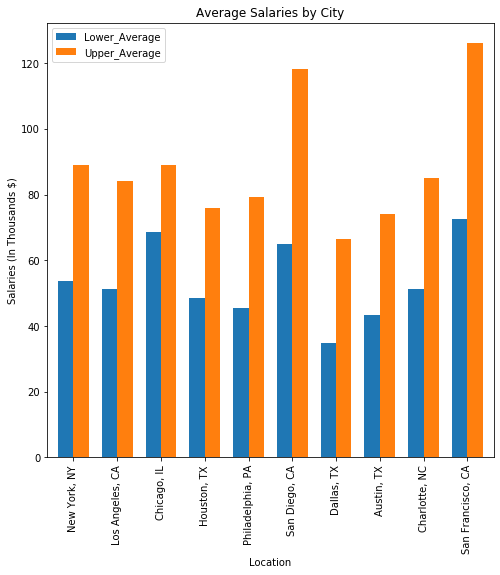

In [238]:
#Since the Lower/Upper_Averages are the same value for each Location, we can drop duplicates
top10 = top10.drop_duplicates(subset = ['Location'])
top10.reset_index().plot(x = 'Location', y = ['Lower_Average', 'Upper_Average'],figsize=(8,8),
                         kind = 'bar', stacked = False , width = 0.7)
plt.ylabel("Salaries (In Thousands $)")
plt.title("Average Salaries by City")
plt.show()

Text(0.5, 1.0, 'Salaries by City')

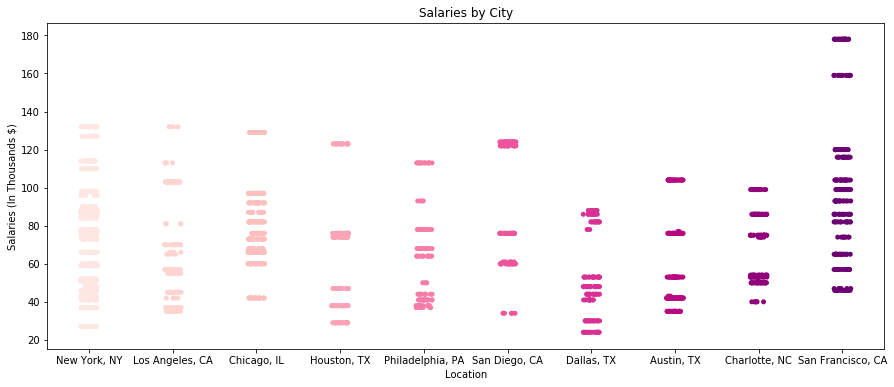

In [236]:
#Recreate the df again since we previously dropped duplicates
top10 = df[df['Location'].isin(['New York, NY', 'Chicago, IL', 'San Francisco, CA', 'Austin, TX',
       'Los Angeles, CA', 'Charlotte, NC', 'Houston, TX', 'Dallas, TX',
       'San Diego, CA', 'Philadelphia, PA'])]

#The melt function is similar to a union in SQL, it melts together the Lower/Upper values into a single column
top10_melted = pd.melt(top10, id_vars=["Location"], value_vars=["Upper", "Lower"])
top10_melted

plt.figure(figsize=(15,6))
strip = sns.stripplot(x = 'Location', y = 'value', data=top10_melted, palette="RdPu")
plt.ylabel("Salaries (In Thousands $)")
plt.title("Salaries by City")

<h3> Does the ratings have an affect on the salary? </h3>

Text(0.5, 1.0, 'Ratings vs Salary')

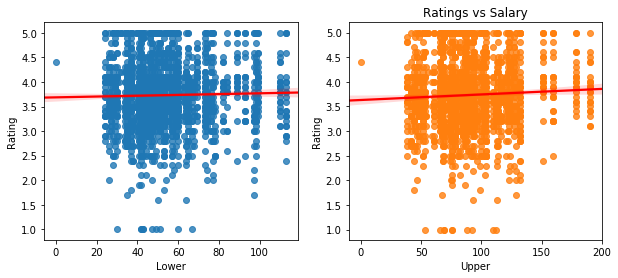

In [258]:
v = df['Lower']
x = df['Upper']
y = df['Rating']

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
sns.regplot(x = v, y = y, line_kws={'color': 'red'},ax=ax[0])
sns.regplot(x = x, y = y, line_kws={'color': 'red'},ax=ax[1])
plt.title("Ratings vs Salary")

